In [8]:
# fake job posting prediction

In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
# importing neccessory libraries
import numpy as np
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("fake_job_postings _P2.csv")



In [14]:
df.head(10) # Displaying the first 10 rows of the DataFrame 'df'


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [15]:
df.describe() #statistics of the DataFrame 


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.dtypes #retrieving the data types of each column in the DataFrame

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [17]:
df.duplicated().any()
df.drop_duplicates(inplace = True) # Checking if there are any duplicated rows in the DataFrame and dropping them if found.


In [18]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()
print("Null values in the entire DataFrame:")
print(null_values)

Null values in the entire DataFrame:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [19]:
df.shape # retrieving the dimensions (number of rows and columns) of the DataFrame.

(17880, 18)

In [20]:
df['salary_range'].head(10) # displaying the first 10 rows of the 'salary_range' column in the DataFrame.

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6    20000-28000
7            NaN
8            NaN
9            NaN
Name: salary_range, dtype: object

In [21]:
df['salary_range'].isnull().sum() # calculating the number of missing (null) values in the 'salary_range' column.

15012

In [22]:
df['salary_range'].count() #counting the number of non-null values in the 'salary_range' column.

2868

In [23]:
df.isnull().sum() # calculating the number of missing (null) values in each column of the DataFrame.

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [24]:
# percentage of missing values for salary range: 
print(((df['salary_range'].isnull().sum())/(df.shape[0]))*100)

83.95973154362416


In [25]:
# percentage of missing values for department column: 
print(((df['department'].isnull().sum())/(df.shape[0]))*100)

64.58053691275167


In [26]:
dropping_columns = ['salary_range','department'] #as the above two columns had more null values, we are dropping them
df = df.drop(dropping_columns, axis=1)

In [27]:
import pandas as pd

# Extract country from the 'location' column and create a new 'Country' column
df['Country'] = df['location'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

# Now, let's check the DataFrame to ensure the 'Country' column is created correctly
df.drop(columns=['location'], inplace=False)


,job_id,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country
0,1,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
17876,17877,Payroll Accountant,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
17877,17878,Project Cost Control Staff Engineer - Cost Con...,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,US
17878,17879,Graphic Designer,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG


In [28]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


In [30]:
df.columns

Index(['job_id', 'title', 'location', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'Country'],
      dtype='object')

In [31]:
features = ['company_profile', 'description', 'requirements', 'benefits']
df[features] = df[features].fillna("No info") # filling missing (null) values in specified columns ('company_profile', 'description', 'requirements', 'benefits') with the string 'No info'.

In [32]:
df['employment_type'] = df['employment_type'].fillna("Other") #  filling missing (null) values in the 'employment_type' column with the string 'Other'.

In [33]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [34]:
import spacy

In [35]:
# Downloading spaCy English language model
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 363.1 kB/s eta 0:00:36
     --------------------------------------- 0.1/12.8 MB 363.1 kB/s eta 0:00:36
     --------------------------------------- 0.2/12.8 MB 573.4 kB/s eta 0:00:23
     - -------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     -- ------------------------------------- 0.8/12.8 MB 2.2 MB/s eta 0:00:06
     -- ------------------------------------- 0.9/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.2/12.8 MB 2.7 MB/s eta 0:00:05
     ---- ----------------------------------- 1.5/12.8 MB 3.1 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 3.3 MB/s eta 0:00:0

In [36]:
# Loading the English language model for spaCy
nlp = spacy.load('en_core_web_sm')
print(nlp)

In [37]:
# Function to extract education and experience from text
def extract_education_and_experience_from_text(text):
    doc = nlp(text)

    # Extract specific education information if available
    education_entities = [ent.text.lower() for ent in doc.ents if 'education' in ent.text.lower()]
    required_education = education_entities[0] if education_entities else 'Not specified'

    # Extract specific experience information if available
    experience_entities = [ent.text.lower() for ent in doc.ents if 'experience' in ent.text.lower()]
    required_experience = experience_entities[0] if experience_entities else 'Not specified'

    return required_education, required_experience

# Apply the function to fill missing values in the DataFrame
def fill_missing_education_experience(row):
    if pd.isnull(row['required_education']) or pd.isnull(row['required_experience']):
        requirements_text = row['requirements']
        required_education, required_experience = extract_education_and_experience_from_text(requirements_text)
        
        # Populate missing values only if they are missing
        if pd.isnull(row['required_education']):
            row['required_education'] = required_education
        if pd.isnull(row['required_experience']):
            row['required_experience'] = required_experience
    
    return row

# Apply the function to fill missing values in the DataFrame
df = df.apply(fill_missing_education_experience, axis=1)

In [38]:
df['function'] = df['function'].fillna('Other', inplace=False)
df['Country'] = df['Country'].fillna('Other', inplace=False)

# Assuming your DataFrame is named 'df'
top_industries = [
    'Information Technology and Services',
    'Computer Software', 
    'Internet',
    'Marketing and Advertising',
    'Education Management'
]

# Get the indices of rows with null values in the 'industry' column
null_indices = df[df['industry'].isnull()].index

# Randomly select industries from the top 5 list to replace the null values
random_industries = np.random.choice(top_industries, size=len(null_indices))

# Replace the null values with the randomly selected industries
df.loc[null_indices, 'industry'] = random_industries

top_countries = ['US', 'GB', 'GR', 'CA', 'DE']

# Get the indices of rows with null values in the 'country' column
null_indices = df[df['Country'].isnull()].index

# Randomly select countries from the top 5 list to replace the null values
random_countries = np.random.choice(top_countries, size=len(null_indices))

# Replace the null values with the randomly selected countries
df.loc[null_indices, 'Country'] = random_countries

In [39]:
# printing the List of textual columns to be combined
text_data = ['title','company_profile', 'description', 'requirements','benefits', 'required_education', 'required_experience','Country', 'industry', 'employment_type']

# Creating a new column 'combined_text' by concatenating values from all specified columns
df['text_feature'] = ''
for col in text_data:
    df['text_feature'] += df[col].fillna('').astype(str) + ' '

# Displaying the updated DataFrame
print(df[['text_feature']])

                                            text_feature
0      Marketing Intern We're Food52, and we've creat...
1      Customer Service - Cloud Video Production 90 S...
2      Commissioning Machinery Assistant (CMA) Valor ...
3      Account Executive - Washington DC Our passion ...
4      Bill Review Manager SpotSource Solutions LLC i...
...                                                  ...
17875  Account Director - Distribution  Vend is looki...
17876  Payroll Accountant WebLinc is the e-commerce p...
17877  Project Cost Control Staff Engineer - Cost Con...
17878  Graphic Designer No info Nemsia Studios is loo...
17879  Web Application Developers Vend is looking for...

[17880 rows x 1 columns]


In [40]:
df.isnull().sum()

job_id                   0
title                    0
location               346
company_profile          0
description              0
requirements             0
benefits                 0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
Country                  0
text_feature             0
dtype: int64

In [41]:
import string as st

In [42]:
# we are now cleaning the textual data.

# converting to lower case letters.
df['text_feature'] = df['text_feature'].str.lower()
#removing the punctuation.
df['text_feature'] = df['text_feature'].apply(lambda x: x.translate(str.maketrans('', '', st.punctuation)))

In [43]:
df['text_feature']

0        marketing intern were food52 and weve created ...
1        customer service  cloud video production 90 se...
2        commissioning machinery assistant cma valor se...
3        account executive  washington dc our passion f...
4        bill review manager spotsource solutions llc i...
                               ...                        
17875    account director  distribution  vend is lookin...
17876    payroll accountant weblinc is the ecommerce pl...
17877    project cost control staff engineer  cost cont...
17878    graphic designer no info nemsia studios is loo...
17879    web application developers vend is looking for...
Name: text_feature, Length: 17880, dtype: object

In [44]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [45]:
import nltk 
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snpav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snpav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [47]:
def tokening_removStopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word in stop_words]
    return ' '.join(filtered_tokens)  # Joining tokens back into a string with spaces

# Applying the function and overwrite the 'text_feature' column
df['text_feature'] = df['text_feature'].apply(tokening_removStopwords)

In [48]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize each token
    return ' '.join(lemmatized_tokens)  # Join the tokens back into a string

# Apply lemmatization to the 'text_feature' column and replace the original text
df['text_feature'] = df['text_feature'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snpav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\snpav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
df['text_feature'] # Accessing the 'text_feature' column of the DataFrame (assuming it contains textual data).


0        were and a and we and and them they in have a ...
1        the is the and to and in the and all in the fr...
2        that the of the with a on the will be with you...
3        our for of through is at the of we do s and an...
4        is a in in ha a of to the of s we in and and i...
                               ...                        
17875    is for some to be in an doing and being about ...
17876    is the and for the s and and to the to that ar...
17877    we for to we are in in it and other and is hav...
17878    no is for an to our the will be in both and wi...
17879    is for some to be in an doing and being about ...
Name: text_feature, Length: 17880, dtype: object

In [50]:
'''In the next step we are vectorzing our textual data using the three different vectorizers namely.
       Count vectorizer
       TF-IDF vectorizer
       Bag of words'''

'In the next step we are vectorzing our textual data using the three different vectorizers namely.\n       Count vectorizer\n       TF-IDF vectorizer\n       Bag of words'

In [51]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

In [53]:
# Importing the CountVectorizer class from scikit-learn's feature_extraction.text module.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating a CountVectorizer object.
C_vectorizer = CountVectorizer()

# Transforming the text data in the 'text_feature' column of the DataFrame into a bag-of-words representation.
text_vector = C_vectorizer.fit_transform(df['text_feature'])

# Printing the text_vector, which represents the transformed text data.
print(text_vector)


  (0, 118)	2
  (0, 8)	37
  (0, 117)	4
  (0, 99)	2
  (0, 104)	1
  (0, 55)	12
  (0, 42)	2
  (0, 75)	5
  (0, 108)	8
  (0, 97)	2
  (0, 0)	1
  (0, 96)	14
  (0, 66)	1
  (0, 129)	9
  (0, 39)	2
  (0, 15)	2
  (0, 22)	4
  (0, 57)	1
  (0, 73)	6
  (0, 59)	1
  (0, 36)	4
  (0, 93)	3
  (0, 65)	1
  (0, 9)	2
  (0, 121)	1
  :	:
  (17879, 133)	4
  (17879, 105)	4
  (17879, 32)	2
  (17879, 27)	1
  (17879, 16)	2
  (17879, 83)	3
  (17879, 7)	4
  (17879, 23)	4
  (17879, 78)	4
  (17879, 53)	1
  (17879, 112)	1
  (17879, 125)	4
  (17879, 86)	2
  (17879, 85)	1
  (17879, 44)	1
  (17879, 62)	1
  (17879, 54)	1
  (17879, 61)	3
  (17879, 47)	2
  (17879, 114)	1
  (17879, 19)	1
  (17879, 113)	3
  (17879, 1)	1
  (17879, 72)	2
  (17879, 109)	2


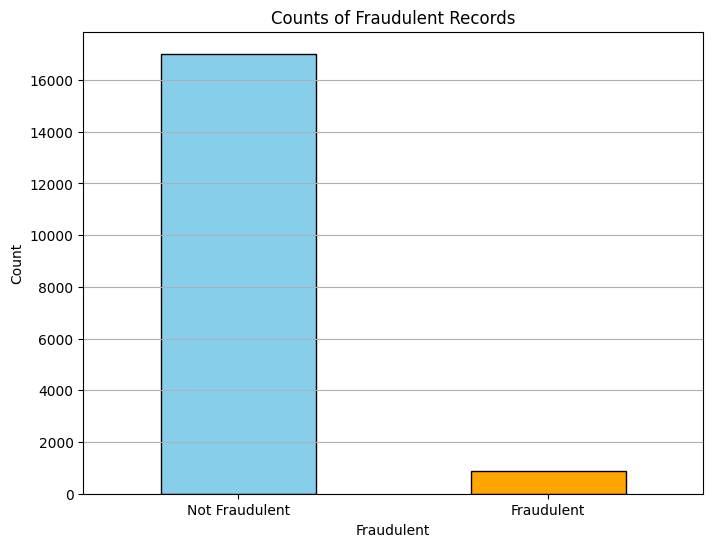

In [54]:
import matplotlib.pyplot as plt

# Count the number of fraudulent and non-fraudulent records
fraudulent_counts = df['fraudulent'].value_counts()

# Create a bar plot to visualize the counts of fraudulent and non-fraudulent records
plt.figure(figsize=(8, 6))
fraudulent_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Counts of Fraudulent Records')
plt.xticks([0, 1], ['Not Fraudulent', 'Fraudulent'], rotation=0)
plt.grid(axis='y')
plt.show()

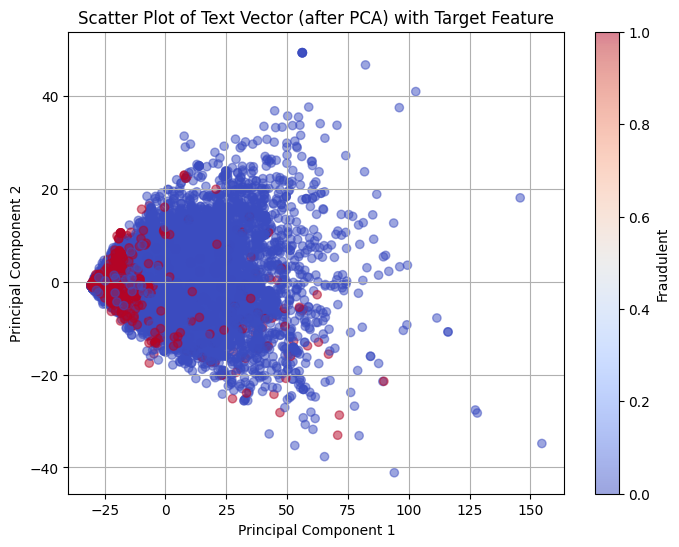

In [55]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality of the sparse matrix using PCA
pca = PCA(n_components=2, svd_solver='arpack')
text_vector_pca = pca.fit_transform(text_vector)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(text_vector_pca[:, 0], text_vector_pca[:, 1], c=df['fraudulent'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Text Vector (after PCA) with Target Feature')
plt.colorbar(label='Fraudulent')
plt.grid(True)
plt.show()

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Adjust the number of features as needed
    ngram_range=(1, 2),  # Consider both unigrams and bigrams
    min_df=5,  # Ignore terms that have a document frequency strictly lower than the given threshold
    max_df=0.7,  # Ignore terms that have a document frequency strictly higher than the given threshold
)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_feature'])
tfidf_array = tfidf_matrix.toarray()

In [58]:
tfidf_array 

array([[0.04756334, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09750427, 0.        , 0.        , ..., 0.        , 0.        ,
        0.09370075],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0552807 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02434526, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

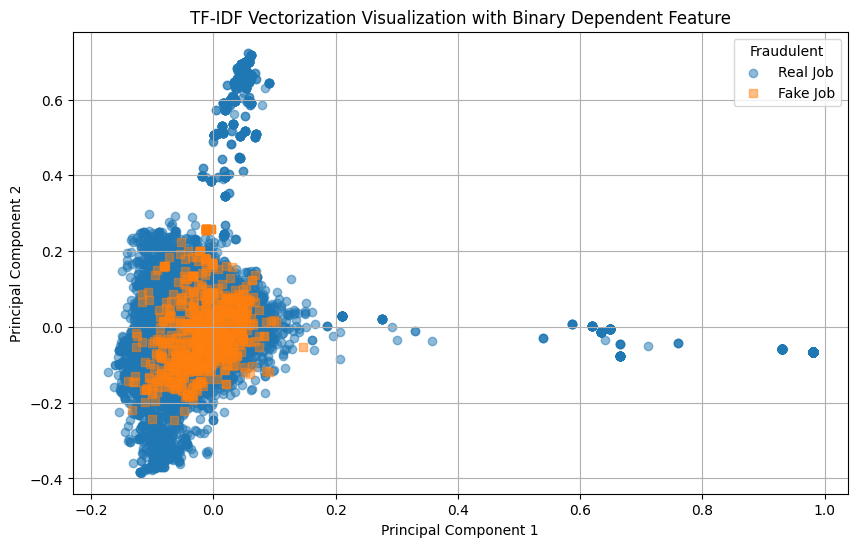

In [60]:
# Assuming df is your DataFrame with 'text_feature' and 'fraudulent' columns

# Encode the categorical dependent feature
label_encoder = LabelEncoder()
df['fraudulent_encoded'] = label_encoder.fit_transform(df['fraudulent'])

# Reduce dimensions for visualization
pca = PCA(n_components=2)
tfidf_matrix_reduced = pca.fit_transform(tfidf_matrix.toarray())

# Define markers for each category (binary classification)
markers = ['o', 's']  # Using circle and square markers

# Scatter plot
plt.figure(figsize=(10, 6))
for label in np.unique(df['fraudulent_encoded']):
    plt.scatter(tfidf_matrix_reduced[df['fraudulent_encoded'] == label, 0],
                tfidf_matrix_reduced[df['fraudulent_encoded'] == label, 1],
                label=label_encoder.inverse_transform([label])[0],
                marker=markers[label],
                alpha=0.5)

plt.title('TF-IDF Vectorization Visualization with Binary Dependent Feature')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Fraudulent', labels=['Real Job', 'Fake Job'])
plt.grid(True)
plt.show()


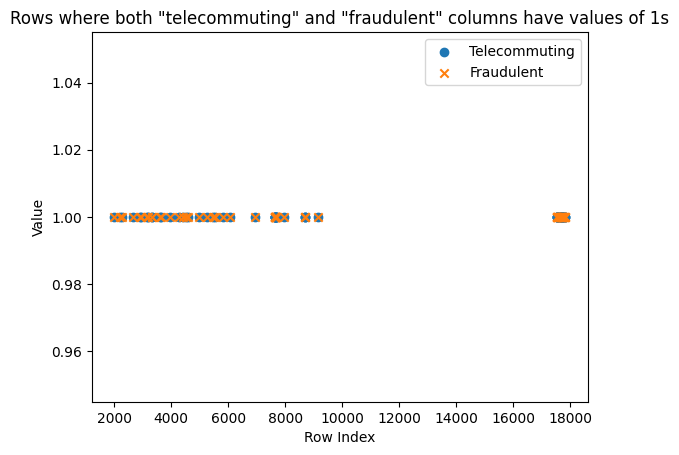

In [61]:
filtered_df = df[(df['telecommuting'] == 1) & (df['fraudulent'] == 1)]

# Create a scatter plot
plt.scatter(filtered_df.index, filtered_df['telecommuting'], label='Telecommuting', marker='o')
plt.scatter(filtered_df.index, filtered_df['fraudulent'], label='Fraudulent', marker='x')

# Set labels and title
plt.xlabel('Row Index')
plt.ylabel('Value')
plt.title('Rows where both "telecommuting" and "fraudulent" columns have values of 1s')
plt.legend()

# Show the plot
plt.show()

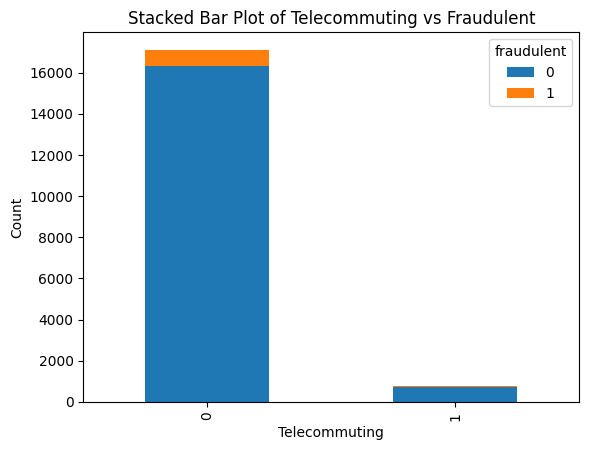

In [62]:
grouped_data = df.groupby(['telecommuting', 'fraudulent']).size().unstack()

# Plot a stacked bar plot
grouped_data.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Telecommuting vs Fraudulent')

# Show the plot
plt.show()

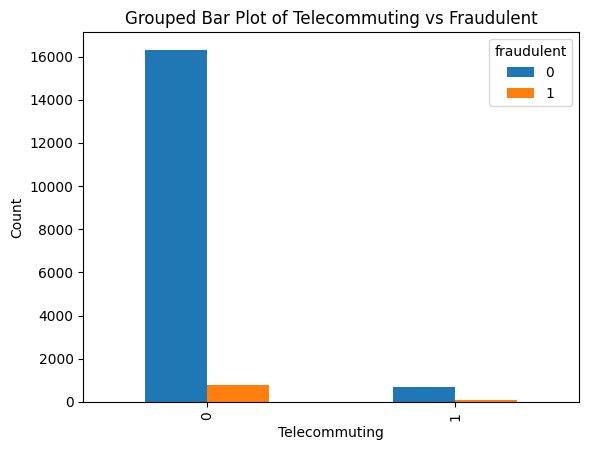

In [63]:
grouped_data.plot(kind='bar')

# Set labels and title
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.title('Grouped Bar Plot of Telecommuting vs Fraudulent')

# Show the plot
plt.show()

In [64]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [65]:
import seaborn as sns

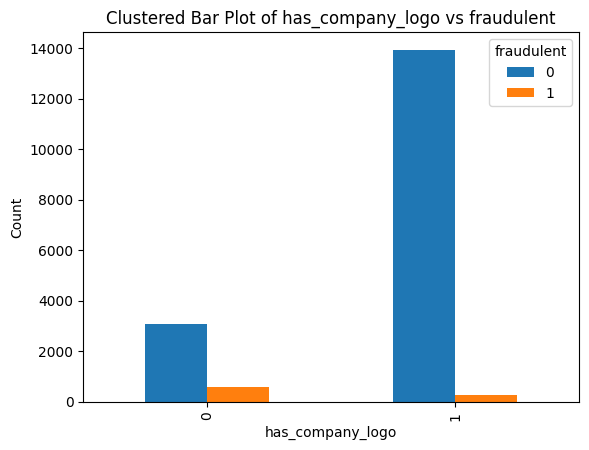

In [66]:
grouped_data = df.groupby(['has_company_logo', 'fraudulent']).size().unstack()

# Plot a clustered bar plot
grouped_data.plot(kind='bar', stacked=False)

# Set labels and title
plt.xlabel('has_company_logo')
plt.ylabel('Count')
plt.title('Clustered Bar Plot of has_company_logo vs fraudulent')

# Show the plot
plt.show()

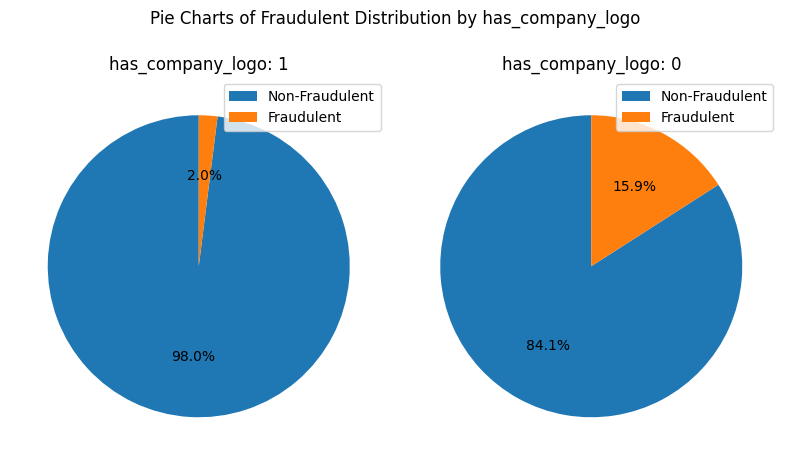

In [67]:
grouped_data = df.groupby(['has_company_logo', 'fraudulent']).size().unstack()

# Get unique categories of 'has_company_logo' column
categories = df['has_company_logo'].unique()

# Create subplots for each category of 'has_company_logo'
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(8, 5))

# Iterate over each category of 'has_company_logo'
for i, category in enumerate(categories):
    # Get data for the current category
    data = grouped_data.loc[category]
    # Plot a pie chart
    data.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90, labels=None, legend=True)
    # Set title for the subplot
    axes[i].set_title(f'has_company_logo: {category}')
    # Set labels
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].legend(labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')

# Set overall title
plt.suptitle('Pie Charts of Fraudulent Distribution by has_company_logo')

# Adjust layout
plt.tight_layout()
plt.show()

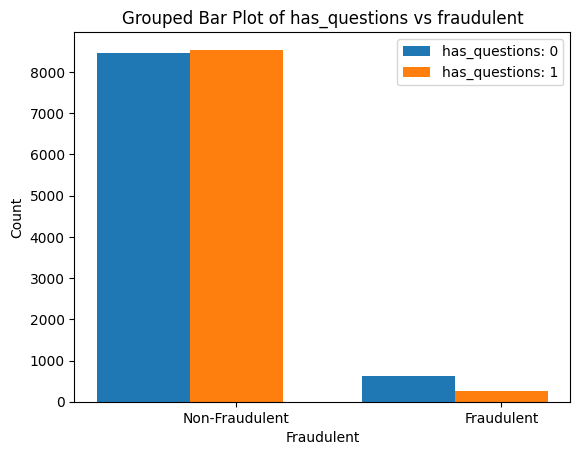

In [68]:
grouped_data = df.groupby(['has_questions', 'fraudulent']).size().unstack()

# Get unique categories of 'has_questions' column
categories = df['has_questions'].unique()

# Define the width of each bar
bar_width = 0.35

# Set the index for the x-axis
indices = range(len(categories))

# Plot the grouped bar plot
fig, ax = plt.subplots()
for i, (has_questions, data) in enumerate(grouped_data.iterrows()):
    ax.bar([index + i * bar_width for index in indices], data, bar_width, label=f'has_questions: {has_questions}')

# Set labels and title
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Grouped Bar Plot of has_questions vs fraudulent')
plt.xticks([index + bar_width for index in indices], ['Non-Fraudulent', 'Fraudulent'])
plt.legend()

# Show the plot
plt.show()

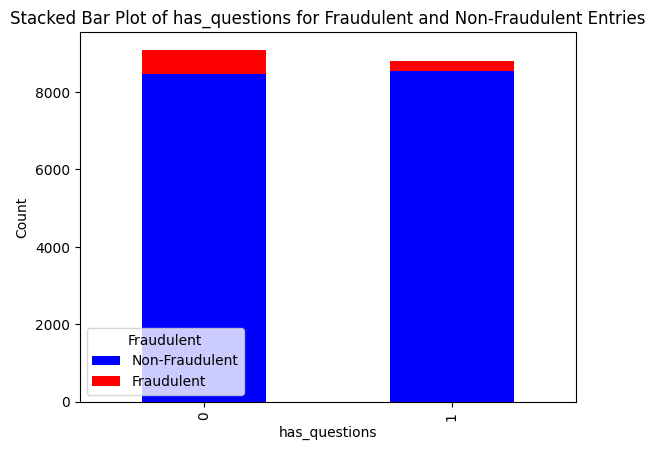

In [69]:
grouped_data = df.groupby(['has_questions', 'fraudulent']).size().unstack()

# Plot a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, color=['blue', 'red'])

# Set labels and title
plt.xlabel('has_questions')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of has_questions for Fraudulent and Non-Fraudulent Entries')

# Add legend
plt.legend(title='Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

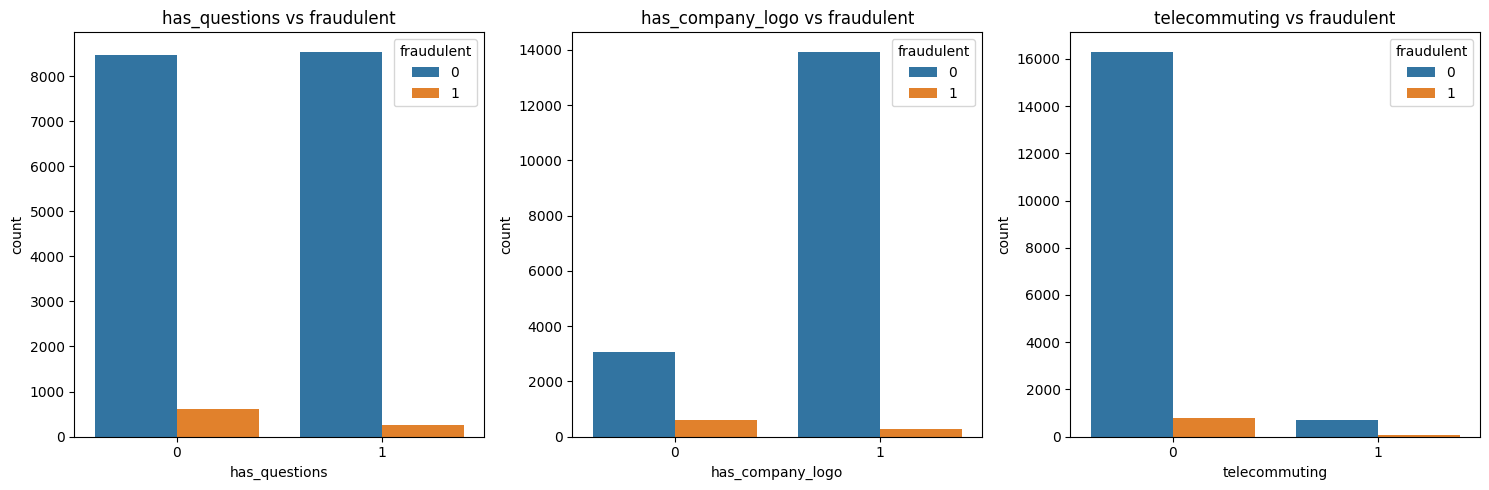

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 'has_questions' vs 'fraudulent'
sns.countplot(x='has_questions', hue='fraudulent', data=df, ax=axes[0])
axes[0].set_title('has_questions vs fraudulent')

# Plot for 'has_company_logo' vs 'fraudulent'
sns.countplot(x='has_company_logo', hue='fraudulent', data=df, ax=axes[1])
axes[1].set_title('has_company_logo vs fraudulent')

# Plot for 'Telecommuting' vs 'fraudulent'
sns.countplot(x='telecommuting', hue='fraudulent', data=df, ax=axes[2])
axes[2].set_title('telecommuting vs fraudulent')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

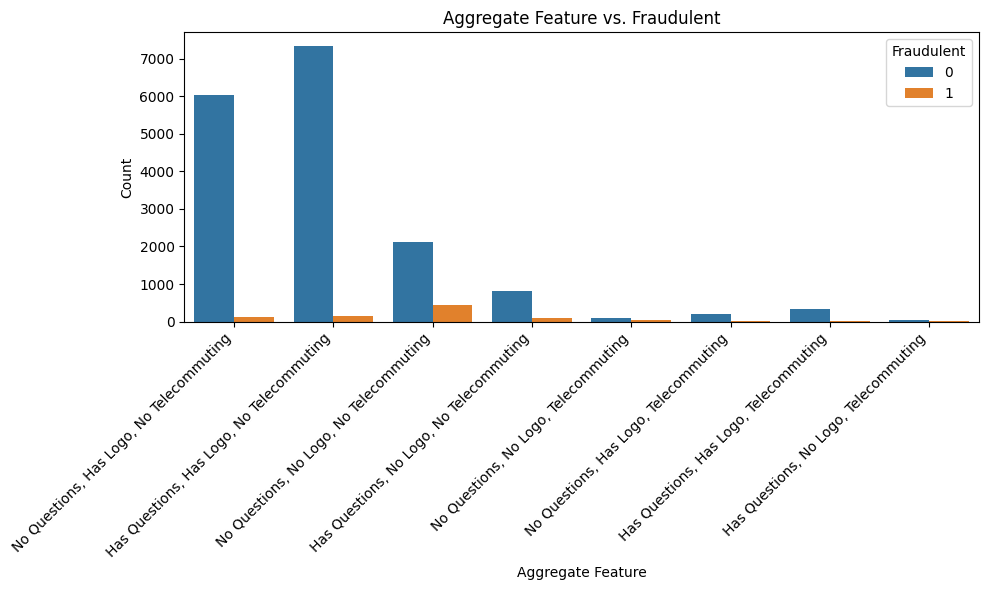

In [71]:
import pandas as pd

# Combine the binary values of input features into a single string
df['aggregate_feature'] = df[['has_questions', 'has_company_logo', 'telecommuting']].astype(str).agg(''.join, axis=1)

# Map the combined strings to unique categories
category_map = {
    '000': 'No Questions, No Logo, No Telecommuting',
    '001': 'No Questions, No Logo, Telecommuting',
    '010': 'No Questions, Has Logo, No Telecommuting',
    '011': 'No Questions, Has Logo, Telecommuting',
    '100': 'Has Questions, No Logo, No Telecommuting',
    '101': 'Has Questions, No Logo, Telecommuting',
    '110': 'Has Questions, Has Logo, No Telecommuting',
    '111': 'Has Questions, Has Logo, Telecommuting'
}
df['aggregate_feature'] = df['aggregate_feature'].map(category_map)

# Plot the aggregate feature against the output feature
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='aggregate_feature', hue='fraudulent')
plt.xlabel('Aggregate Feature')
plt.ylabel('Count')
plt.title('Aggregate Feature vs. Fraudulent')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraudulent', loc='upper right')
plt.tight_layout()
plt.show()


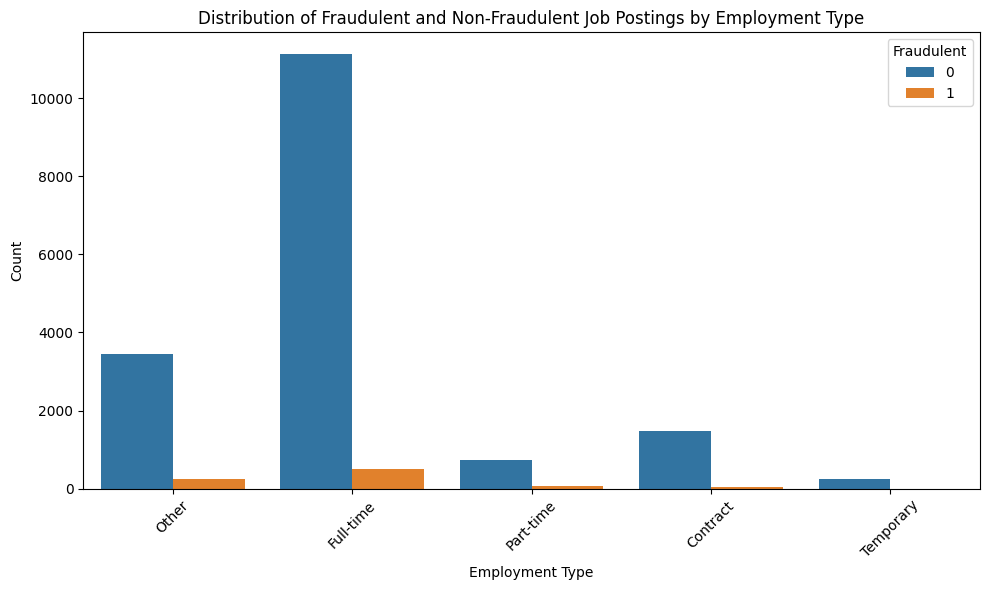

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_type', hue='fraudulent')
plt.title('Distribution of Fraudulent and Non-Fraudulent Job Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent', loc='upper right')
plt.tight_layout()
plt.show()

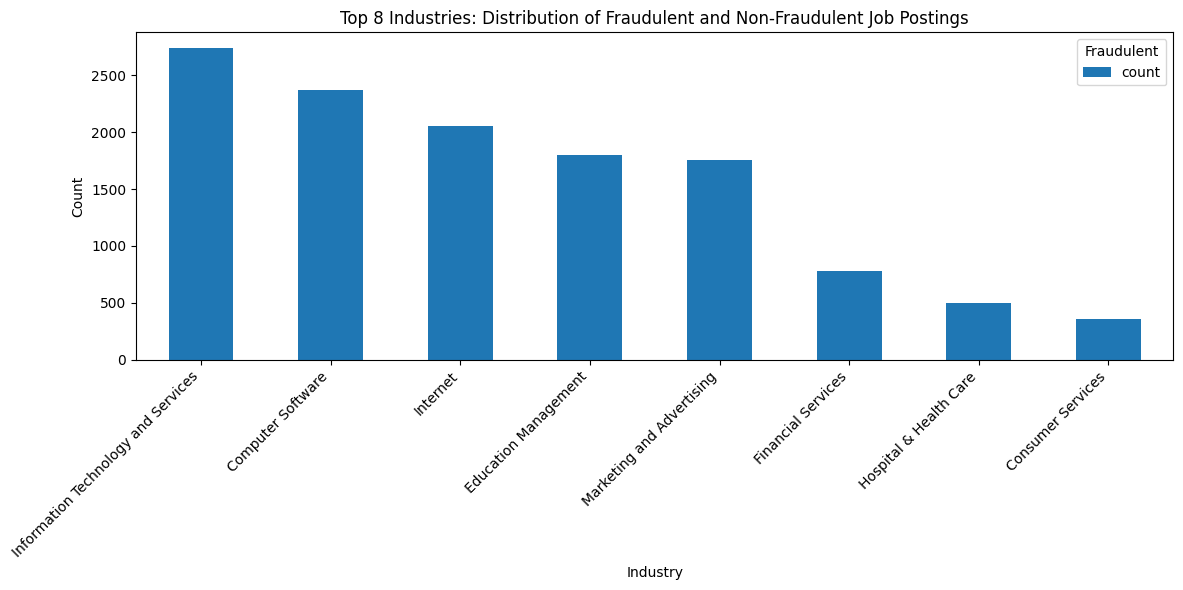

In [73]:
import matplotlib.pyplot as plt

# Assuming 'industry' and 'fraudulent' are columns in the dataset
top_8_industries = df['industry'].value_counts().nlargest(8)

plt.figure(figsize=(12, 6))
top_8_industries.plot(kind='bar', stacked=True)
plt.title('Top 8 Industries: Distribution of Fraudulent and Non-Fraudulent Job Postings')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation angle and alignment
plt.legend(title='Fraudulent', loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

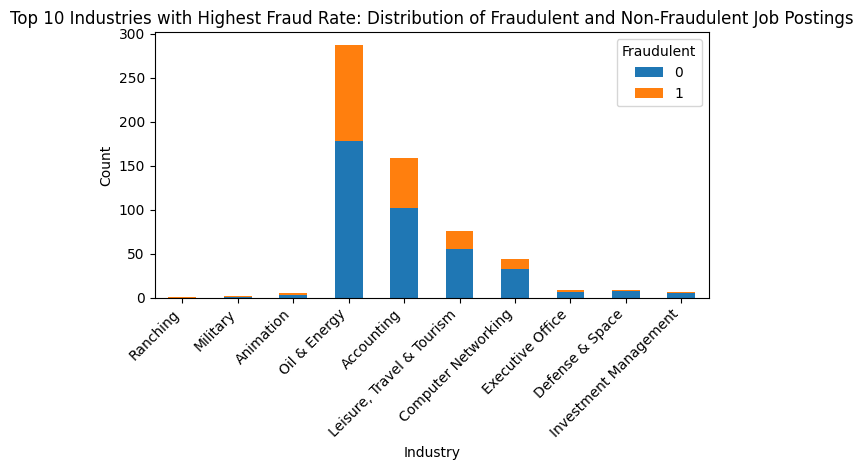

In [74]:
# Assuming 'fraudulent' column is available in the original DataFrame 'df'
# Calculate the counts of fraudulent and non-fraudulent job postings for each industry
industry_counts = df.groupby(['industry', 'fraudulent']).size().unstack()

# Fill NaN values with 0 (if any)
industry_counts = industry_counts.fillna(0)

# Calculate the fraud rate for each industry
industry_counts['Fraud Rate'] = industry_counts[1] / industry_counts.sum(axis=1)

# Sort industries by fraud rate in descending order
industry_counts = industry_counts.sort_values(by='Fraud Rate', ascending=False)

# Select the top 10 industries with the highest fraud rate
top_10_fraudulent_industries = industry_counts.head(10)

# Plot the distribution of fraudulent and non-fraudulent job postings for the top 10 fraudulent industries
plt.figure(figsize=(12, 6))
top_10_fraudulent_industries.drop(columns='Fraud Rate').plot(kind='bar', stacked=True)
plt.title('Top 10 Industries with Highest Fraud Rate: Distribution of Fraudulent and Non-Fraudulent Job Postings')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation angle and alignment
plt.legend(title='Fraudulent', loc='upper right')
plt.tight_layout()
plt.show()

In [75]:
''' Fit the CountVectorizer on the training data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

 tf-idf vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)'''

' Fit the CountVectorizer on the training data\nvectorizer = CountVectorizer()\nX_vectorized = vectorizer.fit_transform(X)\n\n tf-idf vectorization\ntfidf_vectorizer = TfidfVectorizer()\nX = tfidf_vectorizer.fit_transform(X)'

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming X is a pandas DataFrame containing textual features and other features, and y is a pandas Series containing labels

# Initialize TfidfVectorizer to convert text to TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
text_features_tfidf = tfidf_vectorizer.fit_transform(df['text_feature'])

# Convert other features to numpy array
other_features = df[['has_company_logo', 'has_questions', 'telecommuting']].values

# Combine TF-IDF transformed textual features with other features
X = np.concatenate((text_features_tfidf.toarray(), other_features), axis=1)
y = df['fraudulent']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X and y are your features and target variable respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to list-like objects (assuming X_train and X_test are NumPy arrays)
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

# Convert list of lists to list of strings
X_train_list = [' '.join(map(str, x)) for x in X_train_list]
X_test_list = [' '.join(map(str, x)) for x in X_test_list]

# Use TF-IDF vectorization with the converted data
vectorizer = TfidfVectorizer(max_features=9000)  # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train_list)
X_test_vec = vectorizer.transform(X_test_list)

# Train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Multinomial Naive Bayes Classifier Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Multinomial Naive Bayes Classifier Metrics:
Accuracy: 0.96
Precision: 1.00
Recall: 0.21
F1-score: 0.35


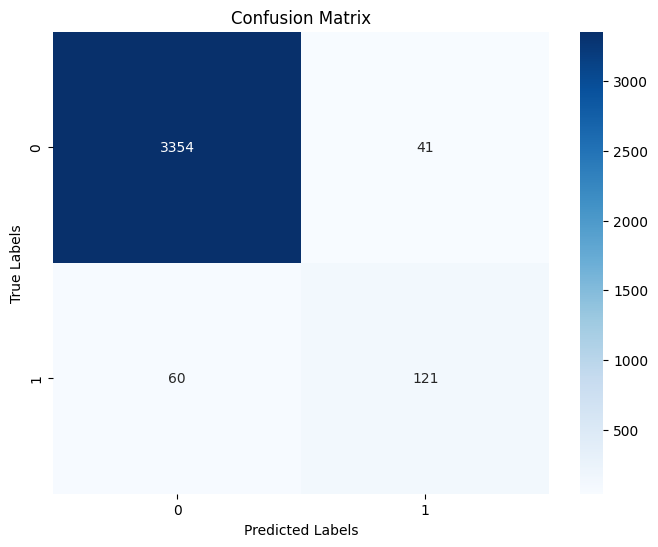

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap with color bar
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


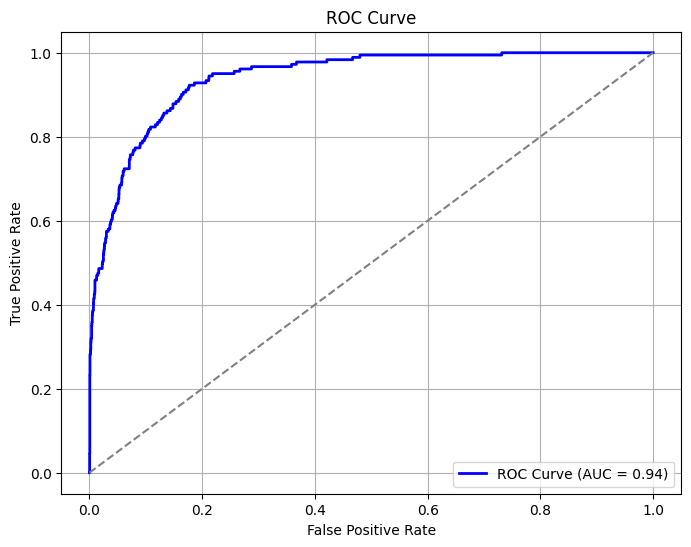

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the positive class
gb_y_probs = gb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_y_probs)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, gb_y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


K-Nearest Neighbors Classifier Metrics (Tuned):
Accuracy: 0.97
Precision: 0.90
Recall: 0.54
F1-score: 0.68


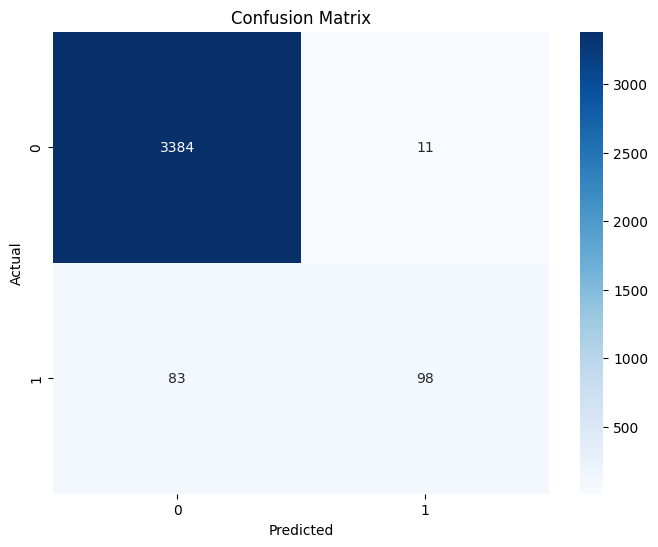

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Create a range of values for n_neighbors
n_neighbors_range = list(range(1, 31))

# Create a parameter grid
param_grid = {'n_neighbors': n_neighbors_range}

# Create a KNN classifier object
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)



print("K-Nearest Neighbors Classifier Metrics (Tuned):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

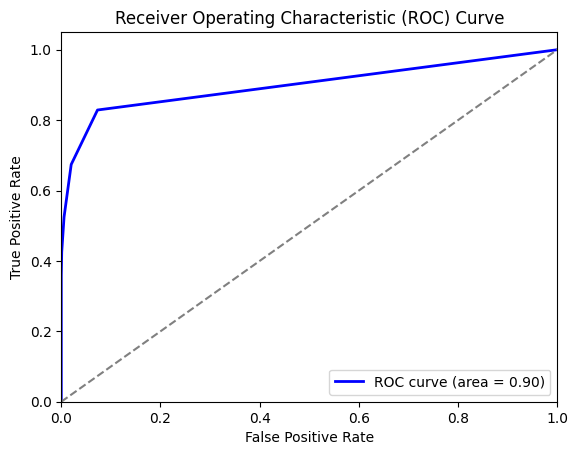

In [122]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Decision Tree Classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(random_state=58, **best_params)
best_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Decision Tree Classifier Metrics (Tuned):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Decision Tree Classifier Metrics (Tuned):
Accuracy: 0.96
Precision: 0.64
Recall: 0.56
F1-score: 0.60


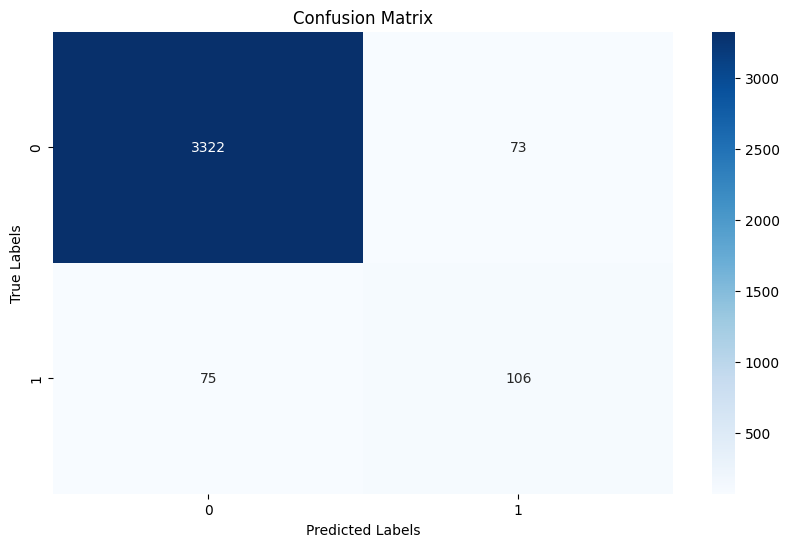

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap with color bar
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


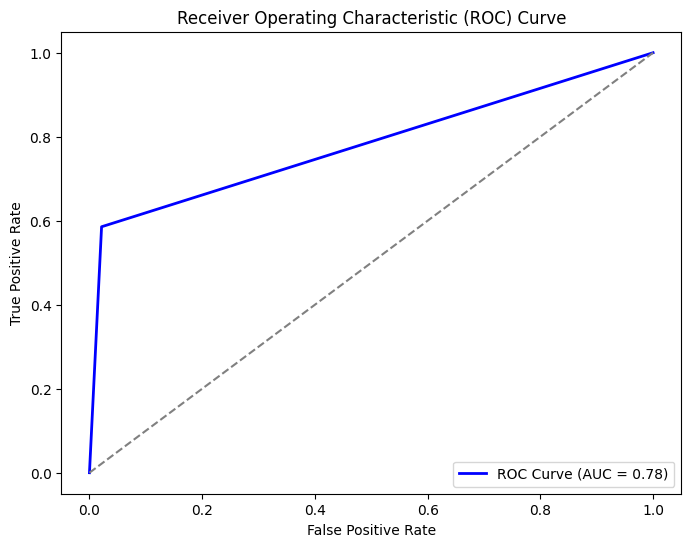

In [121]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Penalty term
}

# Create the Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42, solver='lbfgs')

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the classifier with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params, random_state=68, solver='lbfgs')
best_logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_logistic_regression.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Logistic Regression Classifier Metrics:
Accuracy: 0.96
Precision: 0.90
Recall: 0.19
F1-score: 0.32


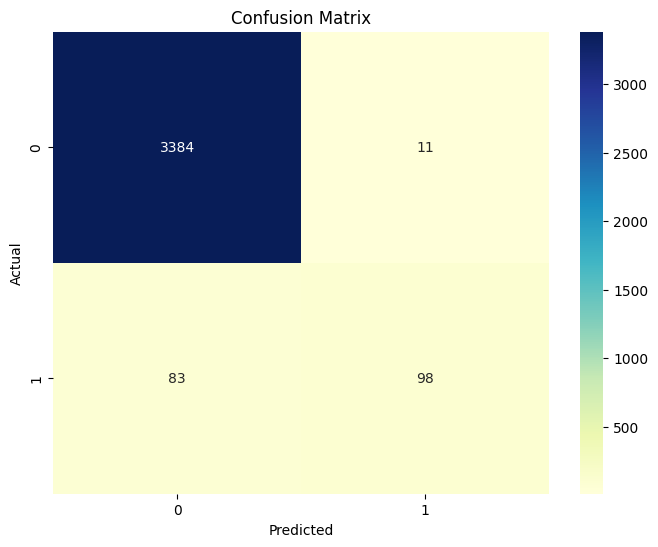

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

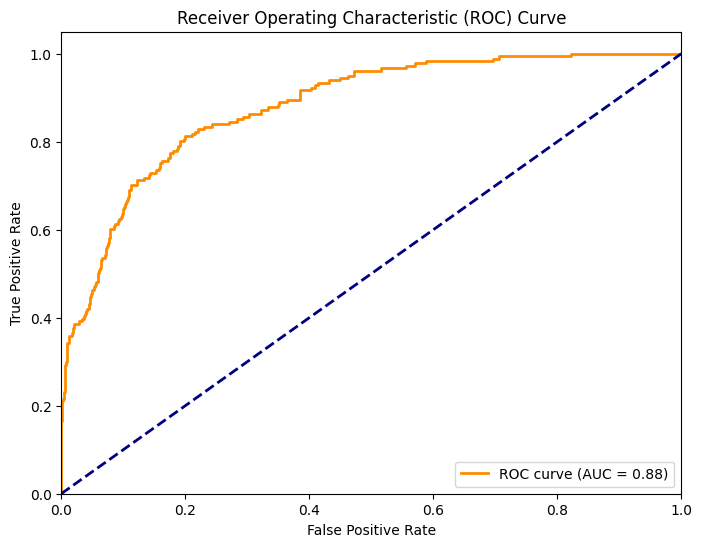

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_pred_prob = best_logistic_regression.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=52)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Random Forest Classifier Metrics (Default Hyperparameters):")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Random Forest Classifier Metrics (Default Hyperparameters):
Accuracy: 0.97
Precision: 1.00
Recall: 0.38
F1-score: 0.55


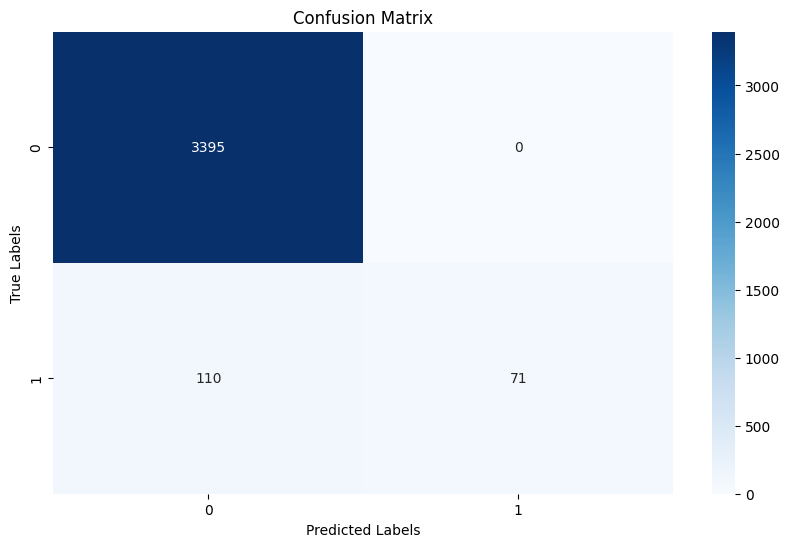

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=59)

# Train the classifier
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap with color bar
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


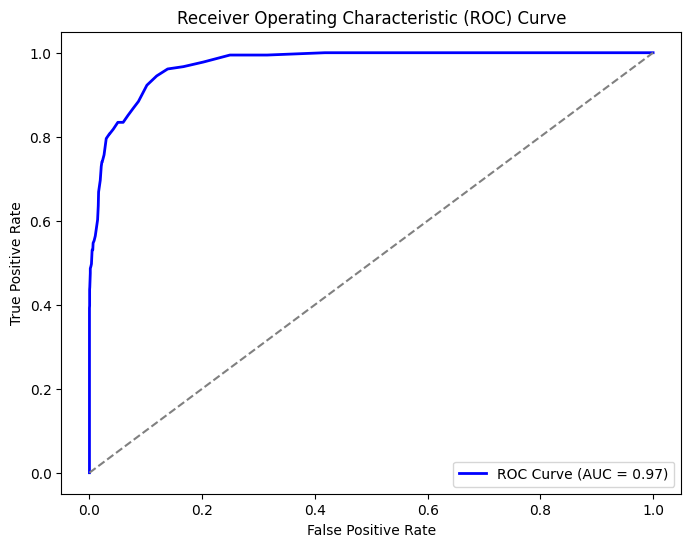

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=59)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [110]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVC classifier with the specified kernel
svm_classifier = SVC(kernel='poly', gamma=0.1)

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Support vector classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Support vector classifier:
Accuracy: 0.97
Precision: 0.75
Recall: 0.67
F1-score: 0.71


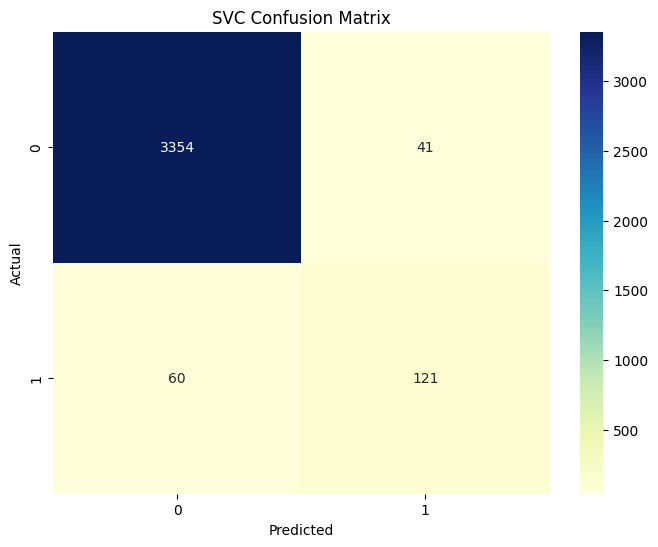

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_svc = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix for SVC
plt.figure(figsize=(8,6))
sns.heatmap(cm_svc, annot=True, cmap="YlGnBu", fmt='g')
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

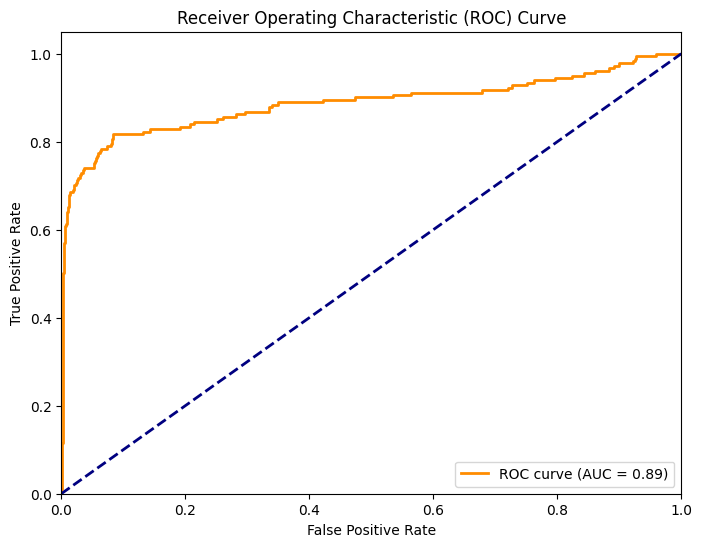

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate the ROC curve for SVC
y_pred_prob = svm_classifier.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Initialize Gradient Boosting Classifier with default hyperparameters
gb_classifier = GradientBoostingClassifier(random_state=70)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
gb_y_pred = gb_classifier.predict(X_test)

# Calculate evaluation metrics for the Gradient Boosting Classifier
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)


print("Gradient Boosting Classifier Metrics (Default Hyperparameters):")

print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1-score: {gb_f1:.2f}")


Gradient Boosting Classifier Metrics (Default Hyperparameters):
Accuracy: 0.96
Precision: 0.82
Recall: 0.34
F1-score: 0.48


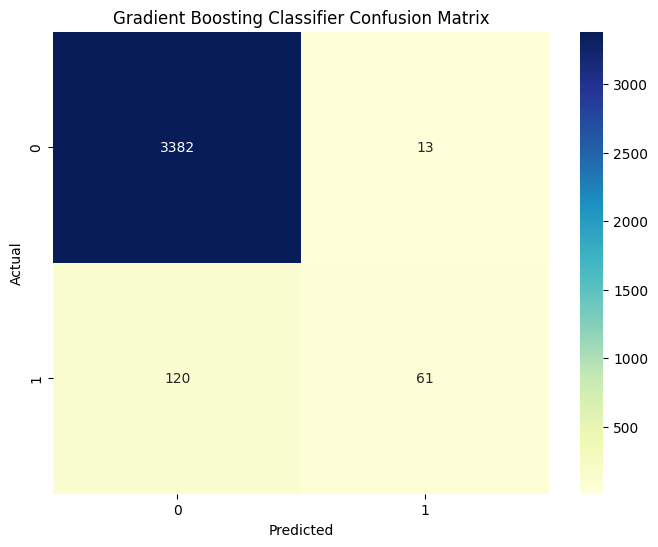

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_gb = confusion_matrix(y_test, gb_y_pred)

# Visualize the confusion matrix for Gradient Boosting Classifier
plt.figure(figsize=(8,6))
sns.heatmap(cm_gb, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

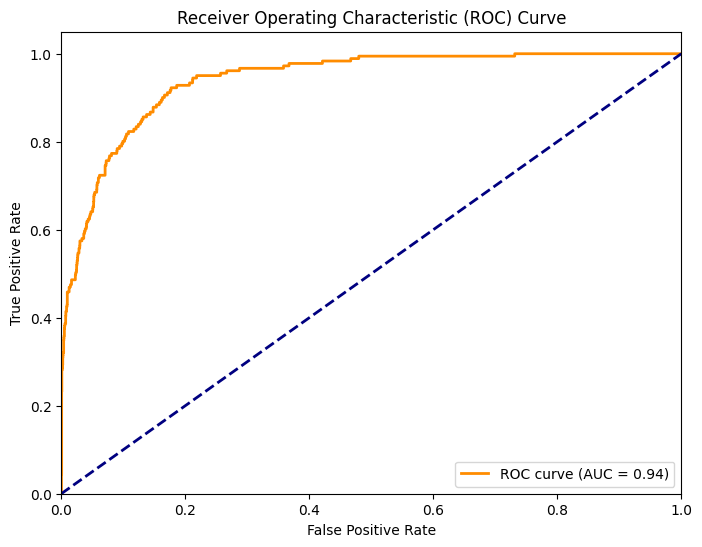

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = gb_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()